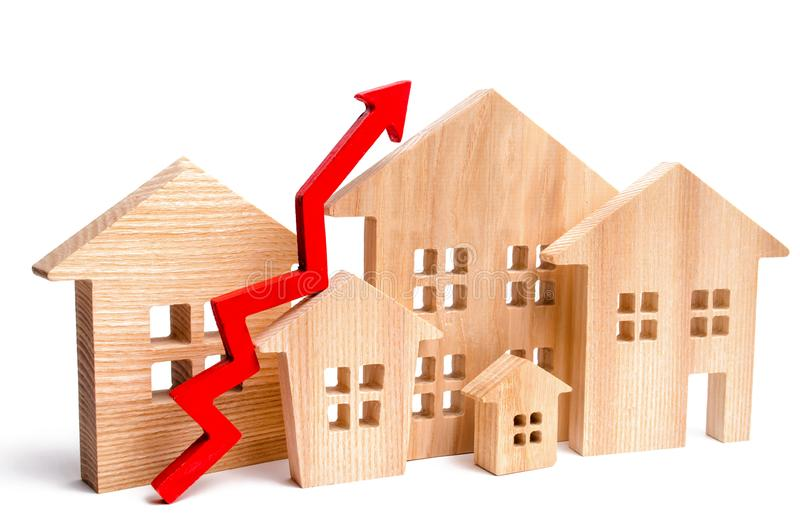

# Introduction
### Problem Statement
I work as a Junior Data Scientist at Proptech Properties Limited. I have been tasked with investigating King County House Sales dataset and draw crucial insights that will help our company improve on house sales by building a high quality model that predicts house sale prices. The company will use this information to reach potential homeowners who are looking to buy high end quality properties.
### Objectives
We seek to address the following questions through data exploration before we can build our model:
1. What are some of the attributes that will influence higher sale prices?
2. Which are some measures to make in order to attract higher house sale prices in King County?

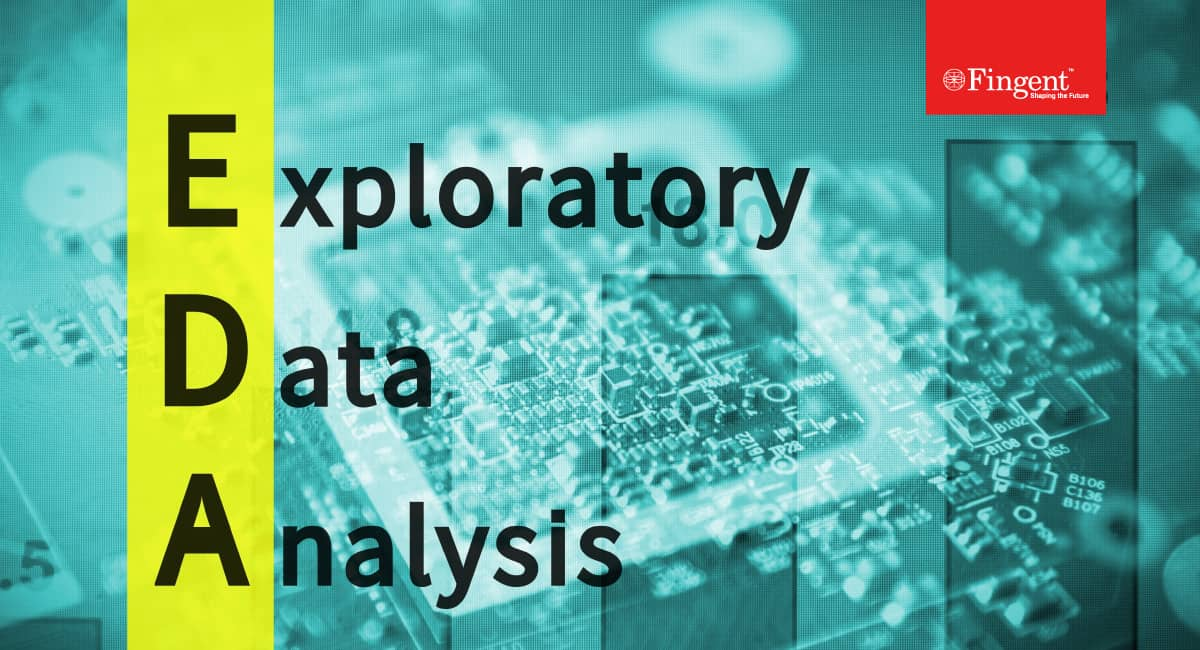

### Data
I was provided with the King County House Sales dataset (kc_house_data.csv) which will be used in the accomplishment of the task at hand. The description of the columns is as below:
- id - unique identified for a house
- dateDate - house was sold
- pricePrice - is prediction target
- bedroomsNumber - of Bedrooms/House
- bathroomsNumber - of bathrooms/bedrooms
- sqft_livingsquare - footage of the home
- sqft_lotsquare - footage of the lot
- floorsTotal - floors (levels) in house
- waterfront - House which has a view to a waterfront
- view - Has been viewed
- condition - How good the condition is ( Overall )
- grade - overall grade given to the housing unit, based on King County grading system
- sqft_above - square footage of house apart from basement
- sqft_basement - square footage of the basement
- yr_built - Built Year
- yr_renovated - Year when house was renovated
- zipcode - zip
- lat - Latitude coordinate
- long - Longitude coordinate
- sqft_living15 - The square footage of interior housing living space for the nearest 15 neighbors
- sqft_lot15 - The square footage of the land lots of the nearest 15 neighbors

### Obtaining the Data
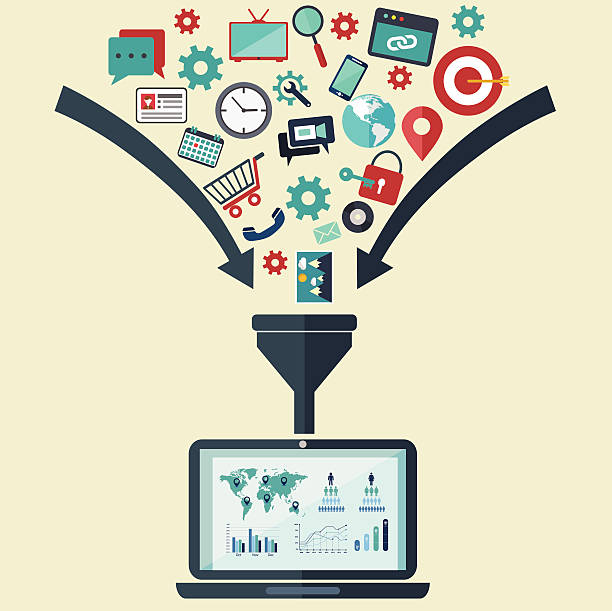
We begin by loading the necessary libraries needed for our task.

In [5]:
#importing the required libraries
import pandas as pd
import numpy as np
import statsmodels.api as sm
import scipy.stats as stats
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.formula.api as smf
from matplotlib import colors
from sklearn import linear_model
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsRegressor
from sklearn import metrics
from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler,PolynomialFeatures
from sklearn.linear_model import Ridge
from sklearn.model_selection import cross_val_score
from mpl_toolkits.mplot3d import Axes3D
%matplotlib inline

In [6]:
#Loading the dataset
df = pd.read_csv('data/kc_house_data.csv')
df

id        date     price  bedrooms  bathrooms  sqft_living  \
0      7129300520  10/13/2014  221900.0         3       1.00         1180   
1      6414100192   12/9/2014  538000.0         3       2.25         2570   
2      5631500400   2/25/2015  180000.0         2       1.00          770   
3      2487200875   12/9/2014  604000.0         4       3.00         1960   
4      1954400510   2/18/2015  510000.0         3       2.00         1680   
...           ...         ...       ...       ...        ...          ...   
21592   263000018   5/21/2014  360000.0         3       2.50         1530   
21593  6600060120   2/23/2015  400000.0         4       2.50         2310   
21594  1523300141   6/23/2014  402101.0         2       0.75         1020   
21595   291310100   1/16/2015  400000.0         3       2.50         1600   
21596  1523300157  10/15/2014  325000.0         2       0.75         1020   

       sqft_lot  floors waterfront  view  ...          grade sqft_above  \
0          5650     1.0        NaN  NONE  ...      7 Average       1180   
1          7242     2.0         NO  NONE  ...      7 Average       2170   
2         10000     1.0         NO  NONE  ...  6 Low Average        770   
3          5000     1.0         NO  NONE  ...      7 Average       1050   
4          8080     1.0         NO  NONE  ...         8 Good       1680   
...         ...     ...        ...   ...  ...            ...        ...   
21592      1131     3.0         NO  NONE  ...         8 Good       1530   
21593      5813     2.0         NO  NONE  ...         8 Good       2310   
21594      1350     2.0         NO  NONE  ...      7 Average       1020   
21595      2388     2.0        NaN  NONE  ...         8 Good       1600   
21596      1076     2.0         NO  NONE  ...      7 Average       1020   

       sqft_basement yr_built  yr_renovated  zipcode      lat     long  \
0                0.0     1955           0.0    98178  47.5112 -122.257   
1              400.0     1951        1991.0    98125  47.7210 -122.319   
2                0.0     1933           NaN    98028  47.7379 -122.233   
3              910.0     1965           0.0    98136  47.5208 -122.393   
4                0.0     1987           0.0    98074  47.6168 -122.045   
...              ...      ...           ...      ...      ...      ...   
21592            0.0     2009           0.0    98103  47.6993 -122.346   
21593            0.0     2014           0.0    98146  47.5107 -122.362   
21594            0.0     2009           0.0    98144  47.5944 -122.299   
21595            0.0     2004           0.0    98027  47.5345 -122.069   
21596            0.0     2008           0.0    98144  47.5941 -122.299   

       sqft_living15  sqft_lot15  
0               1340        5650  
1               1690        7639  
2               2720        8062  
3               1360        5000  
4               1800        7503  
...              ...         ...  
21592           1530        1509  
21593           1830        7200  
21594           1020        2007  
21595           1410        1287  
21596           1020        1357  

[21597 rows x 21 columns]

### Scrubing the data.
We will be cleaning the data and understanding the data types we are working with.

In [7]:
#Checking the shape of the dataframe
df.shape

(21597, 21)

In [8]:
#Checking the description statistics of the dataframe
df.describe()

id         price      bedrooms     bathrooms   sqft_living  \
count  2.159700e+04  2.159700e+04  21597.000000  21597.000000  21597.000000   
mean   4.580474e+09  5.402966e+05      3.373200      2.115826   2080.321850   
std    2.876736e+09  3.673681e+05      0.926299      0.768984    918.106125   
min    1.000102e+06  7.800000e+04      1.000000      0.500000    370.000000   
25%    2.123049e+09  3.220000e+05      3.000000      1.750000   1430.000000   
50%    3.904930e+09  4.500000e+05      3.000000      2.250000   1910.000000   
75%    7.308900e+09  6.450000e+05      4.000000      2.500000   2550.000000   
max    9.900000e+09  7.700000e+06     33.000000      8.000000  13540.000000   

           sqft_lot        floors    sqft_above      yr_built  yr_renovated  \
count  2.159700e+04  21597.000000  21597.000000  21597.000000  17755.000000   
mean   1.509941e+04      1.494096   1788.596842   1970.999676     83.636778   
std    4.141264e+04      0.539683    827.759761     29.375234    399.946414   
min    5.200000e+02      1.000000    370.000000   1900.000000      0.000000   
25%    5.040000e+03      1.000000   1190.000000   1951.000000      0.000000   
50%    7.618000e+03      1.500000   1560.000000   1975.000000      0.000000   
75%    1.068500e+04      2.000000   2210.000000   1997.000000      0.000000   
max    1.651359e+06      3.500000   9410.000000   2015.000000   2015.000000   

            zipcode           lat          long  sqft_living15     sqft_lot15  
count  21597.000000  21597.000000  21597.000000   21597.000000   21597.000000  
mean   98077.951845     47.560093   -122.213982    1986.620318   12758.283512  
std       53.513072      0.138552      0.140724     685.230472   27274.441950  
min    98001.000000     47.155900   -122.519000     399.000000     651.000000  
25%    98033.000000     47.471100   -122.328000    1490.000000    5100.000000  
50%    98065.000000     47.571800   -122.231000    1840.000000    7620.000000  
75%    98118.000000     47.678000   -122.125000    2360.000000   10083.000000  
max    98199.000000     47.777600   -121.315000    6210.000000  871200.000000

In [9]:
#Checking for information of the dataframe
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21597 non-null  int64  
 1   date           21597 non-null  object 
 2   price          21597 non-null  float64
 3   bedrooms       21597 non-null  int64  
 4   bathrooms      21597 non-null  float64
 5   sqft_living    21597 non-null  int64  
 6   sqft_lot       21597 non-null  int64  
 7   floors         21597 non-null  float64
 8   waterfront     19221 non-null  object 
 9   view           21534 non-null  object 
 10  condition      21597 non-null  object 
 11  grade          21597 non-null  object 
 12  sqft_above     21597 non-null  int64  
 13  sqft_basement  21597 non-null  object 
 14  yr_built       21597 non-null  int64  
 15  yr_renovated   17755 non-null  float64
 16  zipcode        21597 non-null  int64  
 17  lat            21597 non-null  float64
 18  long  

In [10]:
#Investigating columns
df.columns

Index(['id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode',
       'lat', 'long', 'sqft_living15', 'sqft_lot15'],
      dtype='object')

#### Date

In [11]:
#Investigating the date column
df['date']

0        10/13/2014
1         12/9/2014
2         2/25/2015
3         12/9/2014
4         2/18/2015
            ...    
21592     5/21/2014
21593     2/23/2015
21594     6/23/2014
21595     1/16/2015
21596    10/15/2014
Name: date, Length: 21597, dtype: object

In [12]:
#Converting the date column into datetime object
df['date'] = pd.to_datetime(df['date'], infer_datetime_format=True)
df['date']

0       2014-10-13
1       2014-12-09
2       2015-02-25
3       2014-12-09
4       2015-02-18
           ...    
21592   2014-05-21
21593   2015-02-23
21594   2014-06-23
21595   2015-01-16
21596   2014-10-15
Name: date, Length: 21597, dtype: datetime64[ns]

#### Price

In [13]:
#Investigating the price column
df['price'].value_counts()

450000.0    172
350000.0    172
550000.0    159
500000.0    152
425000.0    150
           ... 
278800.0      1
439888.0      1
354901.0      1
942000.0      1
402101.0      1
Name: price, Length: 3622, dtype: int64

### House Features

#### Grade

In [14]:
#Investigating the grade column
df['grade'].value_counts()

7 Average        8974
8 Good           6065
9 Better         2615
6 Low Average    2038
10 Very Good     1134
11 Excellent      399
5 Fair            242
12 Luxury          89
4 Low              27
13 Mansion         13
3 Poor              1
Name: grade, dtype: int64

In [15]:
#Converting grade from string to integer
df["grade_int"] = df["grade"].str.split().apply(lambda x: x[0])
df['grade_int'] = df['grade_int'].map(int)

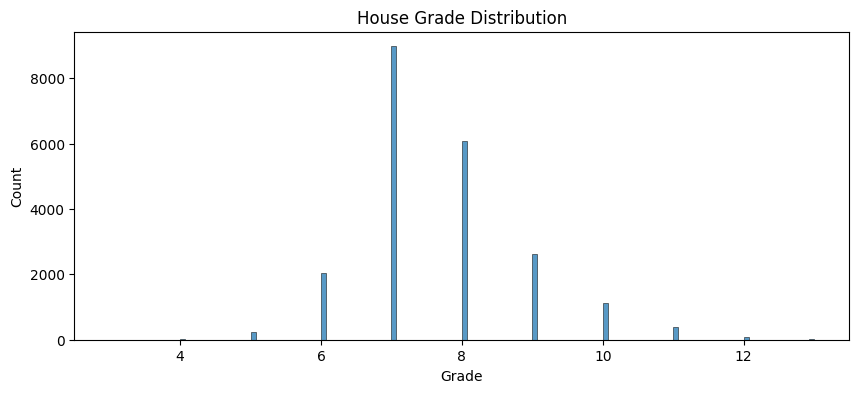

In [16]:
# Distribution of grade
plt.figure(figsize = (10, 4))

cond_dist = sns.histplot(df["grade_int"])
cond_dist.set(xlabel = "Grade", title = "House Grade Distribution")
plt.show()

#### Zipcode

In [17]:
# Investigating zipcode and it's relationship to price
df['zipcode'].value_counts()

98103    602
98038    589
98115    583
98052    574
98117    553
        ... 
98102    104
98010    100
98024     80
98148     57
98039     50
Name: zipcode, Length: 70, dtype: int64

#### Waterfront

In [18]:
#Investigating the waterfront column
df['waterfront'].value_counts()

NO     19075
YES      146
Name: waterfront, dtype: int64

In [19]:
#Replacing the yes and no into integers
df['waterfront'] = df['waterfront'].replace({'NO': 0, 'YES': 1})
df['waterfront'].value_counts()

0.0    19075
1.0      146
Name: waterfront, dtype: int64

#### View

In [20]:
#Investigating the view column
df['view'].value_counts()

NONE         19422
AVERAGE        957
GOOD           508
FAIR           330
EXCELLENT      317
Name: view, dtype: int64

In [21]:
#Converting view column from an object into an integer
df['view'] = df['view'].replace({'NONE': 0, 'AVERAGE': 1, 'GOOD': 2, 'FAIR': 3, 'EXCELLENT': 4})
df['view'].value_counts()

0.0    19422
1.0      957
2.0      508
3.0      330
4.0      317
Name: view, dtype: int64

#### Year renovated

In [22]:
#Investigating year renovated column
df['yr_renovated'].value_counts()

0.0       17011
2014.0       73
2013.0       31
2003.0       31
2007.0       30
          ...  
1951.0        1
1953.0        1
1946.0        1
1976.0        1
1948.0        1
Name: yr_renovated, Length: 70, dtype: int64

#### Condition

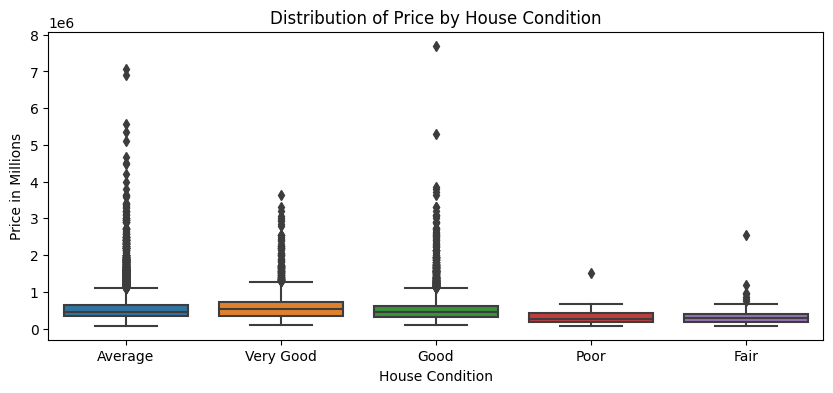

In [23]:
# Overall price distribution
plt.figure(figsize = (10, 4))

cond_price_plot = sns.boxplot(x = "condition", y = "price", data = df)
cond_price_plot.set(xlabel = "House Condition", ylabel = "Price in Millions", title = "Distribution of Price by House Condition")
plt.show()

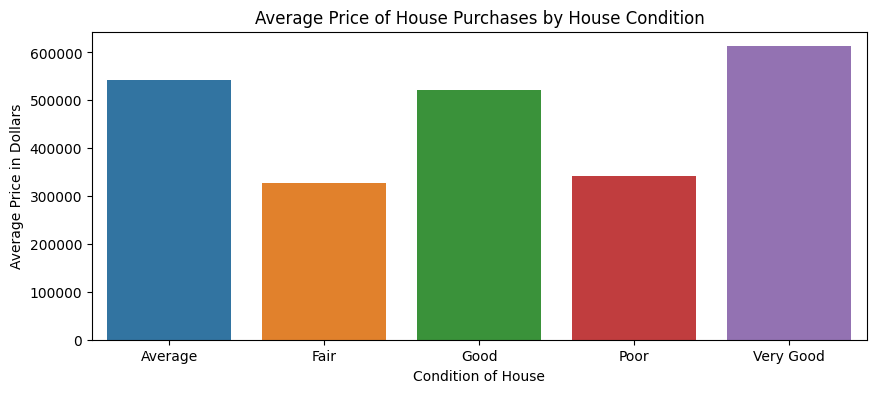

In [24]:
# Average prices
plt.figure(figsize=(10, 4))

cond_group = df.groupby(by=["condition"])
cond_price = cond_group["price"].mean()
cond_avg_price_plot = sns.barplot(x=cond_price.index, y=cond_price.values)
cond_avg_price_plot.set(xlabel="Condition of House", ylabel="Average Price in Dollars", title="Average Price of House Purchases by House Condition")
plt.show()

### Dealing with missing values

In [25]:
#Checking for missing values
df.isnull().sum()

id                  0
date                0
price               0
bedrooms            0
bathrooms           0
sqft_living         0
sqft_lot            0
floors              0
waterfront       2376
view               63
condition           0
grade               0
sqft_above          0
sqft_basement       0
yr_built            0
yr_renovated     3842
zipcode             0
lat                 0
long                0
sqft_living15       0
sqft_lot15          0
grade_int           0
dtype: int64

In [26]:
#Investigating columns with missing values 
df[['waterfront', 'view', 'yr_renovated']].describe()

waterfront          view  yr_renovated
count  19221.000000  21534.000000  17755.000000
mean       0.007596      0.196480     83.636778
std        0.086825      0.688242    399.946414
min        0.000000      0.000000      0.000000
25%        0.000000      0.000000      0.000000
50%        0.000000      0.000000      0.000000
75%        0.000000      0.000000      0.000000
max        1.000000      4.000000   2015.000000

In [27]:
#Filling null values with zero
def fill_null_values(df):
    return df.fillna(0)

In [28]:
# Apply function to df
df = fill_null_values(df)

In [29]:
#Checking dataframe for any missing values
df.isna().sum()

id               0
date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
grade_int        0
dtype: int64

### Dealing with duplicates

In [30]:
#Checking for duplicates in the dataframe
df.duplicated().sum()

0

In [31]:
#Checking for duplicates in our unique identifier(id column)
df['id'].duplicated().sum()

177

We have to keep the duplicated items as a house may have been sold more than twice. Trying to change may cause skewness in our model.

### Visualizations
We need a visual understanding of our dataframe. We will develop a few plots to see the distribution of the different elements of our data.

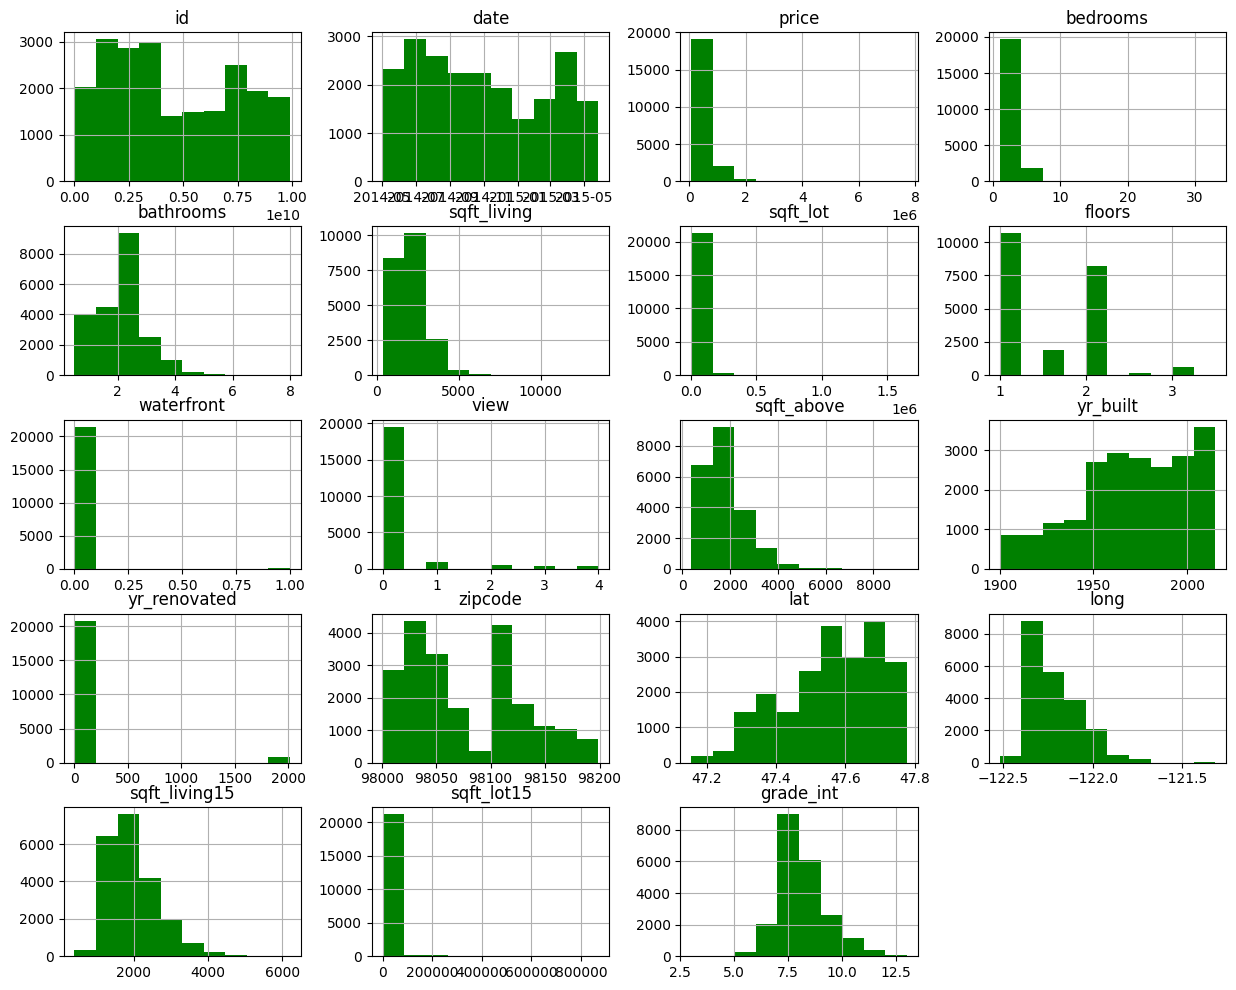

In [32]:
#Creating visual distributions of all variables using histograms
df.hist(figsize = (15, 12), color = 'green')
plt.show()

#### Price

In [33]:
df['price_log'] = np.log(df['price'])
df['price_log']

0        12.309982
1        13.195614
2        12.100712
3        13.311329
4        13.142166
           ...    
21592    12.793859
21593    12.899220
21594    12.904459
21595    12.899220
21596    12.691580
Name: price_log, Length: 21597, dtype: float64

In [34]:
df['price_log'].describe().round(2)

count    21597.00
mean        13.05
std          0.53
min         11.26
25%         12.68
50%         13.02
75%         13.38
max         15.86
Name: price_log, dtype: float64

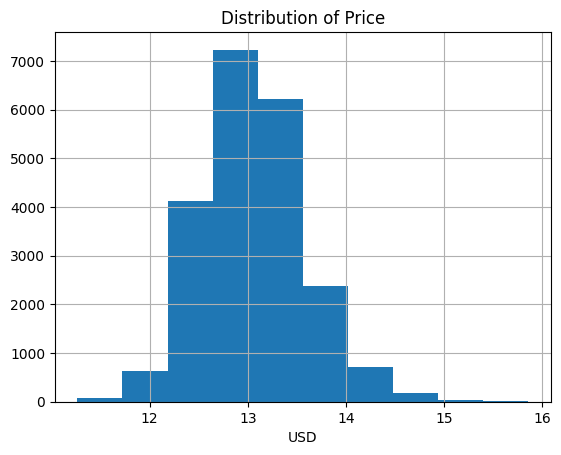

In [35]:
#Visualizing price feature
df['price_log'].hist()
plt.xlabel('USD')
plt.title('Distribution of Price')
plt.show()

C:\Users\user\AppData\Local\Temp\ipykernel_3964\1989960259.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  price_dist = sns.distplot(df["price_log"])


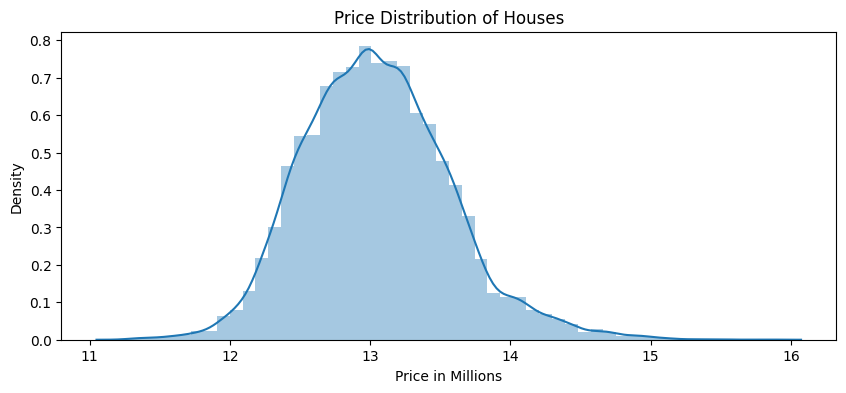

In [36]:
plt.figure(figsize = (10,4))

price_dist = sns.distplot(df["price_log"])
price_dist.set(xlabel = "Price in Millions", title = "Price Distribution of Houses")
plt.show()

C:\Users\user\AppData\Local\Temp\ipykernel_3964\2029477180.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  logged_price_dist = sns.distplot(np.log(df["price_log"]))


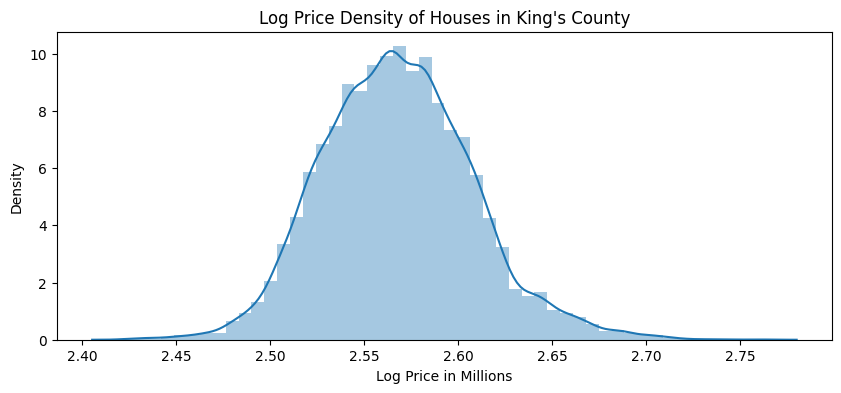

In [37]:
plt.figure(figsize=(10,4))

logged_price_dist = sns.distplot(np.log(df["price_log"]))
logged_price_dist.set(xlabel="Log Price in Millions", title="Log Price Density of Houses in King's County")
plt.show()

## Data Preparation for Modelling

### Linearity
We are going to investiate the continuous variables of our dataframe and investigate their relationship to price and inspect their linearity and distributions.

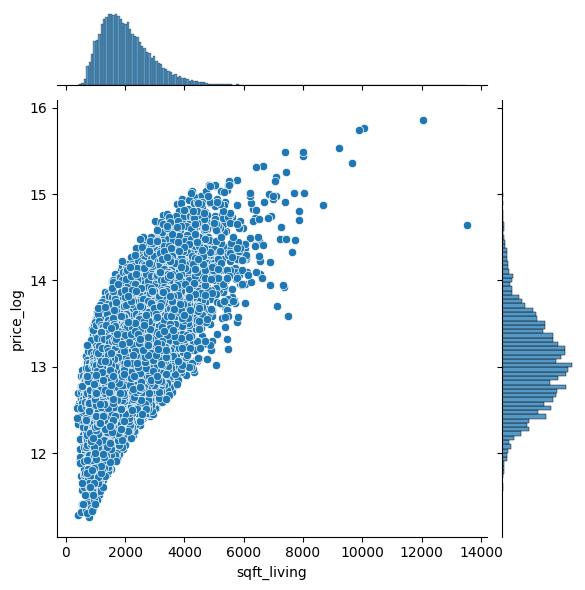

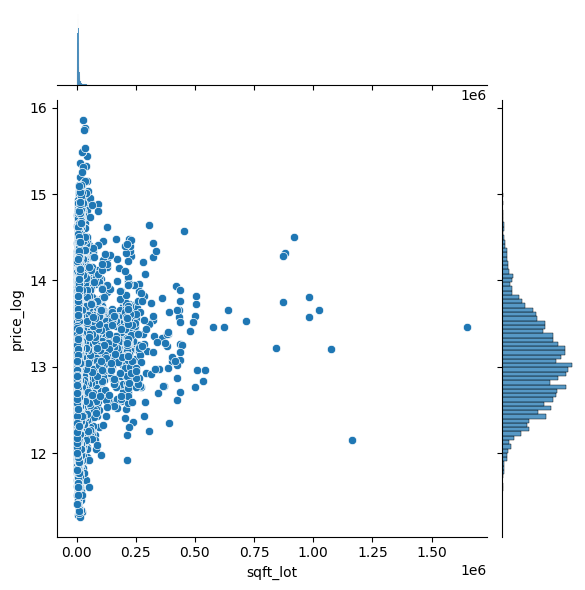

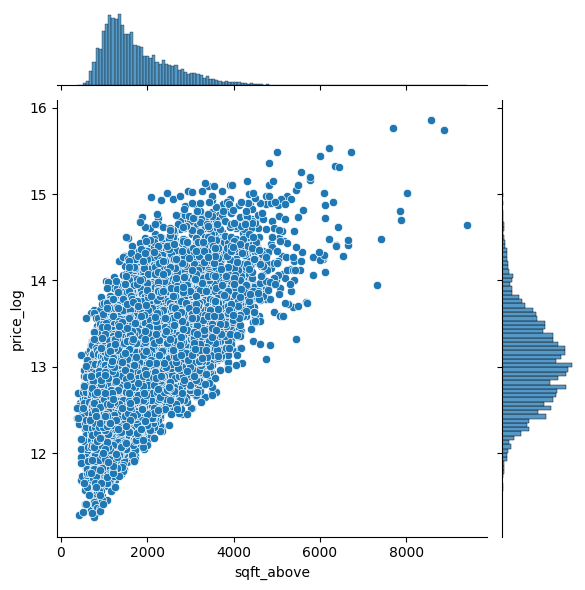

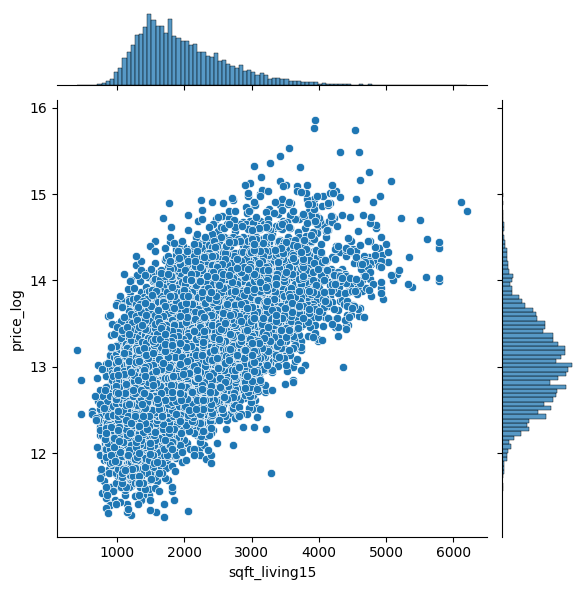

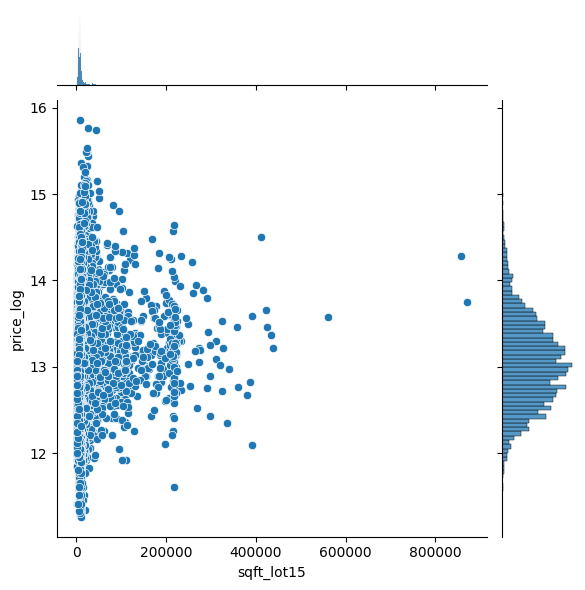

In [38]:
cont_var = ['sqft_living', 'sqft_lot', 'sqft_above', 'sqft_living15', 'sqft_lot15']

for i in cont_var:
    sns.jointplot(x = df[i], y = df['price_log'])

### Multicollinearity
We investigate features in our dataframe that are correlated

In [39]:
corr = df.corr()
corr

C:\Users\user\AppData\Local\Temp\ipykernel_3964\2438084875.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = df.corr()


id     price  bedrooms  bathrooms  sqft_living  sqft_lot  \
id             1.000000 -0.016772  0.001150   0.005162    -0.012241 -0.131911   
price         -0.016772  1.000000  0.308787   0.525906     0.701917  0.089876   
bedrooms       0.001150  0.308787  1.000000   0.514508     0.578212  0.032471   
bathrooms      0.005162  0.525906  0.514508   1.000000     0.755758  0.088373   
sqft_living   -0.012241  0.701917  0.578212   0.755758     1.000000  0.173453   
sqft_lot      -0.131911  0.089876  0.032471   0.088373     0.173453  1.000000   
floors         0.018608  0.256804  0.177944   0.502582     0.353953 -0.004814   
waterfront    -0.003599  0.264306 -0.002127   0.063629     0.104637  0.021459   
view           0.012039  0.386430  0.070475   0.169760     0.262220  0.052990   
sqft_above    -0.010799  0.605368  0.479386   0.686668     0.876448  0.184139   
yr_built       0.021617  0.053953  0.155670   0.507173     0.318152  0.052946   
yr_renovated  -0.010612  0.117855  0.017900   0.047177     0.051060  0.004979   
zipcode       -0.008211 -0.053402 -0.154092  -0.204786    -0.199802 -0.129586   
lat           -0.001798  0.306692 -0.009951   0.024280     0.052155 -0.085514   
long           0.020672  0.022036  0.132054   0.224903     0.241214  0.230227   
sqft_living15 -0.002701  0.585241  0.393406   0.569884     0.756402  0.144763   
sqft_lot15    -0.138557  0.082845  0.030690   0.088303     0.184342  0.718204   
grade_int      0.008188  0.667951  0.356563   0.665838     0.762779  0.114731   
price_log     -0.003751  0.891745  0.343360   0.551249     0.695185  0.100025   

                 floors  waterfront      view  sqft_above  yr_built  \
id             0.018608   -0.003599  0.012039   -0.010799  0.021617   
price          0.256804    0.264306  0.386430    0.605368  0.053953   
bedrooms       0.177944   -0.002127  0.070475    0.479386  0.155670   
bathrooms      0.502582    0.063629  0.169760    0.686668  0.507173   
sqft_living    0.353953    0.104637  0.262220    0.876448  0.318152   
sqft_lot      -0.004814    0.021459  0.052990    0.184139  0.052946   
floors         1.000000    0.020797  0.016413    0.523989  0.489193   
waterfront     0.020797    1.000000  0.412224    0.071778 -0.024487   
view           0.016413    0.412224  1.000000    0.149484 -0.055078   
sqft_above     0.523989    0.071778  0.149484    1.000000  0.424037   
yr_built       0.489193   -0.024487 -0.055078    0.424037  1.000000   
yr_renovated   0.003793    0.073939  0.092280    0.020645 -0.202555   
zipcode       -0.059541    0.028923  0.085281   -0.261570 -0.347210   
lat            0.049239   -0.012157  0.014710   -0.001199 -0.148370   
long           0.125943   -0.037628 -0.090301    0.344842  0.409993   
sqft_living15  0.280102    0.083823  0.260412    0.731767  0.326377   
sqft_lot15    -0.010722    0.030658  0.053175    0.195077  0.070777   
grade_int      0.458794    0.082818  0.227019    0.756073  0.447865   
price_log      0.310630    0.170720  0.332736    0.601579  0.080583   

               yr_renovated   zipcode       lat      long  sqft_living15  \
id                -0.010612 -0.008211 -0.001798  0.020672      -0.002701   
price              0.117855 -0.053402  0.306692  0.022036       0.585241   
bedrooms           0.017900 -0.154092 -0.009951  0.132054       0.393406   
bathrooms          0.047177 -0.204786  0.024280  0.224903       0.569884   
sqft_living        0.051060 -0.199802  0.052155  0.241214       0.756402   
sqft_lot           0.004979 -0.129586 -0.085514  0.230227       0.144763   
floors             0.003793 -0.059541  0.049239  0.125943       0.280102   
waterfront         0.073939  0.028923 -0.012157 -0.037628       0.083823   
view               0.092280  0.085281  0.014710 -0.090301       0.260412   
sqft_above         0.020645 -0.261570 -0.001199  0.344842       0.731767   
yr_built          -0.202555 -0.347210 -0.148370  0.409993       0.326377   
yr_renovated       1.000000  0.062397  0.027970 -0.064543       0.0

C:\Users\user\AppData\Local\Temp\ipykernel_3964\1826510184.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = df.corr()


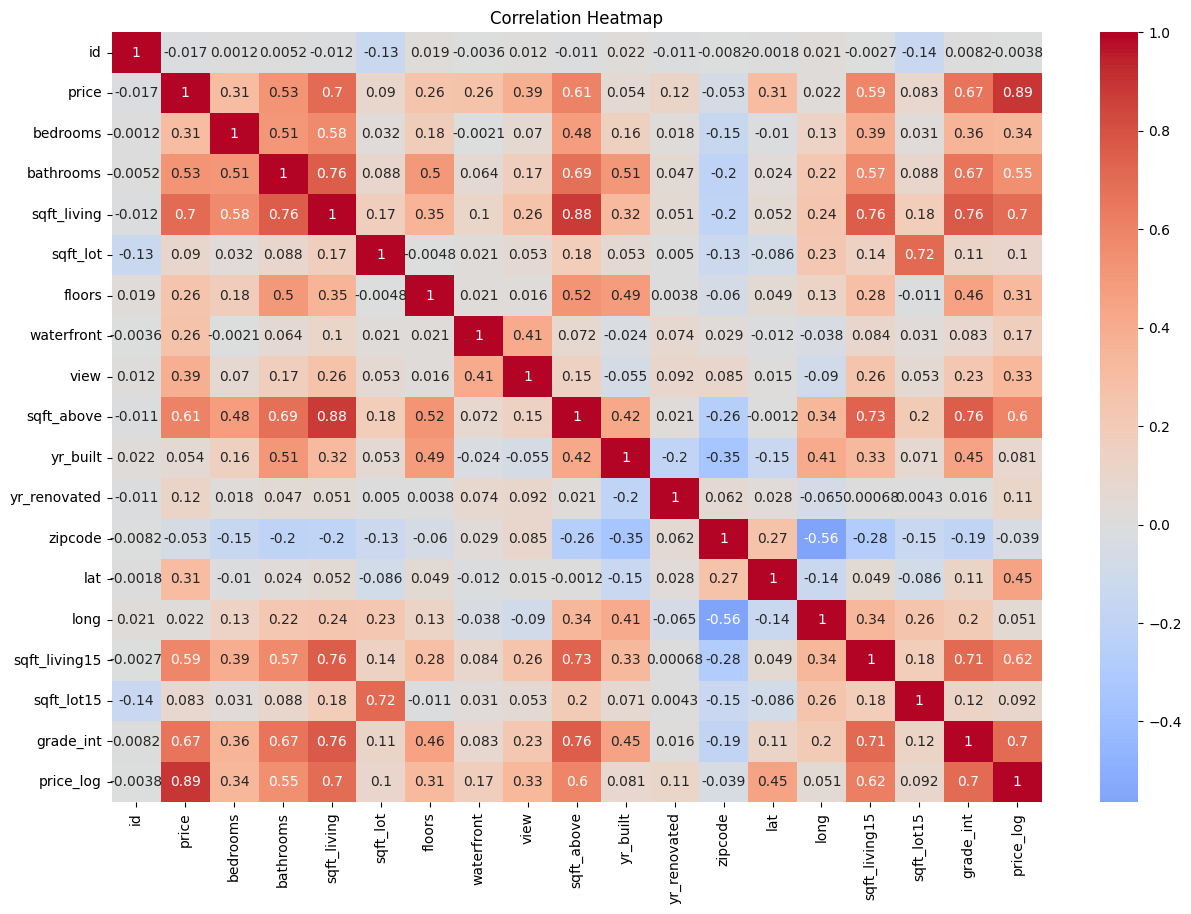

In [40]:
#Correlation heatmap
corr = df.corr()

# Plot heatmap
plt.figure(figsize = (15,10))
sns.heatmap(corr, center = 0, annot = True, cmap = 'coolwarm')
plt.title('Correlation Heatmap')
plt.show()

### Building a New DataFrame
We are going to build a new dataframe with the features of interest and drop those that we will not carry into our modelling phase.

In [41]:
df_new = df[['condition', 'date', 'price_log', 'bedrooms', 'bathrooms', 'waterfront', 'sqft_living', 'floors', 'zipcode', 'grade_int', 'yr_built']]
df_new

condition       date  price_log  bedrooms  bathrooms  waterfront  \
0        Average 2014-10-13  12.309982         3       1.00         0.0   
1        Average 2014-12-09  13.195614         3       2.25         0.0   
2        Average 2015-02-25  12.100712         2       1.00         0.0   
3      Very Good 2014-12-09  13.311329         4       3.00         0.0   
4        Average 2015-02-18  13.142166         3       2.00         0.0   
...          ...        ...        ...       ...        ...         ...   
21592    Average 2014-05-21  12.793859         3       2.50         0.0   
21593    Average 2015-02-23  12.899220         4       2.50         0.0   
21594    Average 2014-06-23  12.904459         2       0.75         0.0   
21595    Average 2015-01-16  12.899220         3       2.50         0.0   
21596    Average 2014-10-15  12.691580         2       0.75         0.0   

       sqft_living  floors  zipcode  grade_int  yr_built  
0             1180     1.0    98178          7      1955  
1             2570     2.0    98125          7      1951  
2              770     1.0    98028          6      1933  
3             1960     1.0    98136          7      1965  
4             1680     1.0    98074          8      1987  
...            ...     ...      ...        ...       ...  
21592         1530     3.0    98103          8      2009  
21593         2310     2.0    98146          8      2014  
21594         1020     2.0    98144          7      2009  
21595         1600     2.0    98027          8      2004  
21596         1020     2.0    98144          7      2008  

[21597 rows x 11 columns]

In [61]:
df_new.to_csv('cleaned_kc_house_data.csv')

In [59]:
df_new.copy()

condition       date  price_log  bedrooms  bathrooms  waterfront  \
0        Average 2014-10-13  12.309982         3       1.00         0.0   
1        Average 2014-12-09  13.195614         3       2.25         0.0   
2        Average 2015-02-25  12.100712         2       1.00         0.0   
3      Very Good 2014-12-09  13.311329         4       3.00         0.0   
4        Average 2015-02-18  13.142166         3       2.00         0.0   
...          ...        ...        ...       ...        ...         ...   
21592    Average 2014-05-21  12.793859         3       2.50         0.0   
21593    Average 2015-02-23  12.899220         4       2.50         0.0   
21594    Average 2014-06-23  12.904459         2       0.75         0.0   
21595    Average 2015-01-16  12.899220         3       2.50         0.0   
21596    Average 2014-10-15  12.691580         2       0.75         0.0   

       sqft_living  floors  zipcode  grade_int  yr_built  
0             1180     1.0    98178          7      1955  
1             2570     2.0    98125          7      1951  
2              770     1.0    98028          6      1933  
3             1960     1.0    98136          7      1965  
4             1680     1.0    98074          8      1987  
...            ...     ...      ...        ...       ...  
21592         1530     3.0    98103          8      2009  
21593         2310     2.0    98146          8      2014  
21594         1020     2.0    98144          7      2009  
21595         1600     2.0    98027          8      2004  
21596         1020     2.0    98144          7      2008  

[21597 rows x 11 columns]

In [43]:
df_new.head()

condition       date  price_log  bedrooms  bathrooms  waterfront  \
0    Average 2014-10-13  12.309982         3       1.00         0.0   
1    Average 2014-12-09  13.195614         3       2.25         0.0   
2    Average 2015-02-25  12.100712         2       1.00         0.0   
3  Very Good 2014-12-09  13.311329         4       3.00         0.0   
4    Average 2015-02-18  13.142166         3       2.00         0.0   

   sqft_living  floors  zipcode  grade_int  yr_built  
0         1180     1.0    98178          7      1955  
1         2570     2.0    98125          7      1951  
2          770     1.0    98028          6      1933  
3         1960     1.0    98136          7      1965  
4         1680     1.0    98074          8      1987

### Modelling
We will build a few models that will help us meet our goal. We will have a general model that gives us a general idea of our goal. We will have another one that is specific and have a final one that compares between the two built models.

### Simple Linear Regression
We will utilise features that had the highest positive correlation coefficients to price as they'll serve as good predictors when building our model.

#### Model 1

In [45]:
#Defining X_train and y_train and reshape X_train into column vector
train_data,test_data = train_test_split(df, train_size = 0.8, random_state = 42)
reg = linear_model.LinearRegression()
x_train = np.array(train_data['sqft_living']).reshape(-1, 1)
y_train = np.array(train_data['price_log']).reshape(-1, 1)
reg.fit(x_train, y_train)

x_test = np.array(test_data['sqft_living']).reshape(-1, 1)
y_test = np.array(test_data['price_log']).reshape(-1, 1)
pred = reg.predict(x_test)

x_int = sm.add_constant(x_train)
results = sm.OLS(y_train, x_int).fit()
summary = results.summary()
mean_squared_error = metrics.mean_squared_error(y_test, pred)

print(summary)


print('Simple Linear Regression model')
print('R squared training: ', round(reg.score(x_train, y_train), 3))
print('R squared testing: ', round(reg.score(x_test, y_test), 3))
print('Mean Squared Error(MSE): ', round(np.sqrt(mean_squared_error), 2))
print('Root Mean Squared Error(RMSE): ', ((results.resid ** 2).sum() / len(y_train)) ** 0.5)

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.484
Model:                            OLS   Adj. R-squared:                  0.483
Method:                 Least Squares   F-statistic:                 1.617e+04
Date:                Fri, 30 Sep 2022   Prob (F-statistic):               0.00
Time:                        11:10:45   Log-Likelihood:                -7763.4
No. Observations:               17277   AIC:                         1.553e+04
Df Residuals:                   17275   BIC:                         1.555e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         12.2165      0.007   1706.393      0.0

Our model has returned an R-squared of 0.484. This meamns that 48.4% of the variations in the dependent variable(price) are explained by our independent variable(sqft_living). The p-value is above our threshold of alpha 0.05 thus not a strong model.

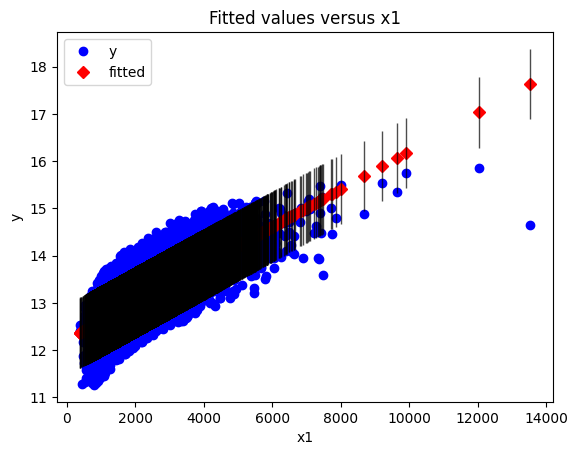

In [46]:
#Visualizing the linear model
sm.graphics.plot_fit(results, 'x1')
plt.show()

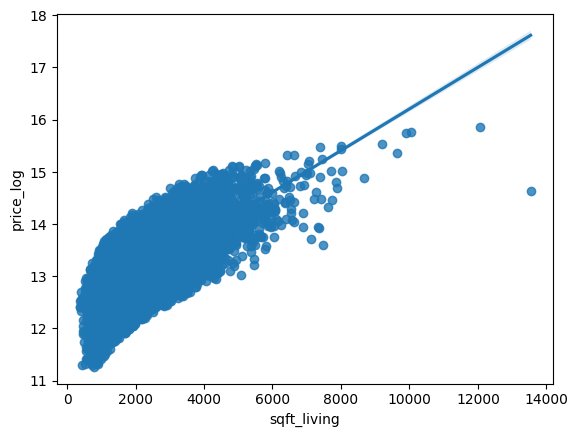

In [47]:
#Visualizing the linear model
sns.regplot(x = "sqft_living", y = "price_log", data = df);

In [48]:
residuals = results.resid
residuals

array([-0.07801593,  0.08549007,  0.12810319, ..., -0.21753232,
        0.04050951, -0.10975473])

C:\Users\user\AppData\Local\Temp\ipykernel_3964\3802013234.py:4: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show();


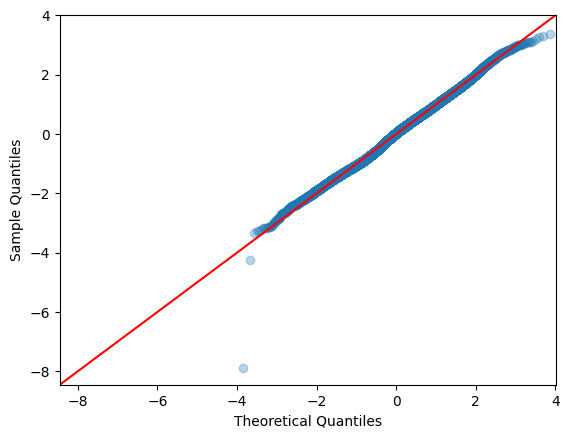

In [49]:
#Plotting residuals
residuals = results.resid
fig = sm.graphics.qqplot(residuals, dist=stats.norm, alpha = 0.3, line='45', fit=True)
fig.show();

#### Visualizing our model using a Q-Q Plot
Q-Q plot enables us to compare the quantiles of the residuals to the quantiles of a theoretical normal distribution.
The farther from the line that the data points appear, the farther from a normal distribution they are.

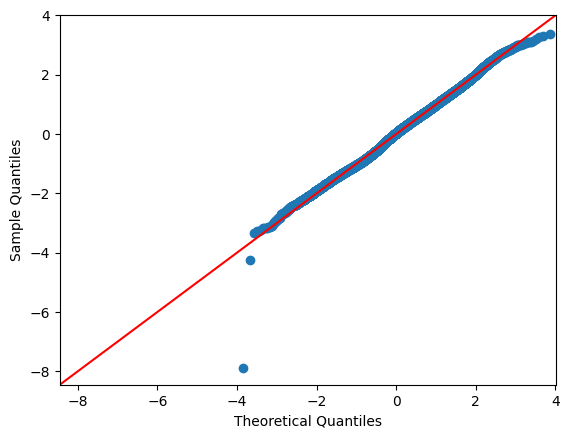

In [50]:
#Visualizing in Q-Q plot
sm.graphics.qqplot(residuals, dist = stats.norm, line = '45', fit = True)
plt.show()

From the above, it is evident our model is performing on the smaller values and seems not to be meeting the linear regression assumptions. Thus using one variable as an indicator in our model does not give us a strong model

### Multiple Linear Regression

#### Model 2

In [51]:
#Checking for collinearity in the new dataframe
df_new.corr()['price_log']

C:\Users\user\AppData\Local\Temp\ipykernel_3964\3606463032.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df_new.corr()['price_log']


price_log      1.000000
bedrooms       0.343360
bathrooms      0.551249
waterfront     0.170720
sqft_living    0.695185
floors         0.310630
zipcode       -0.038788
grade_int      0.703720
yr_built       0.080583
Name: price_log, dtype: float64

<AxesSubplot: xlabel='bathrooms', ylabel='price_log'>

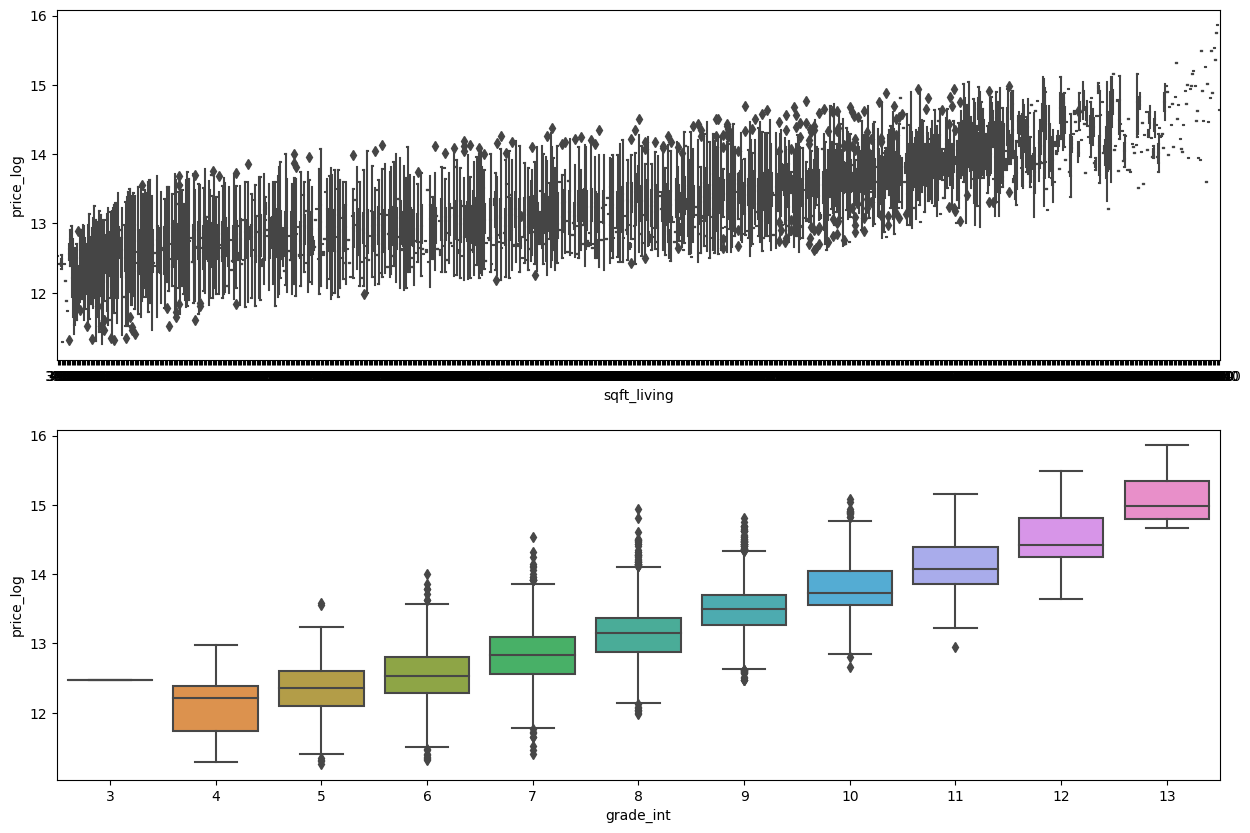

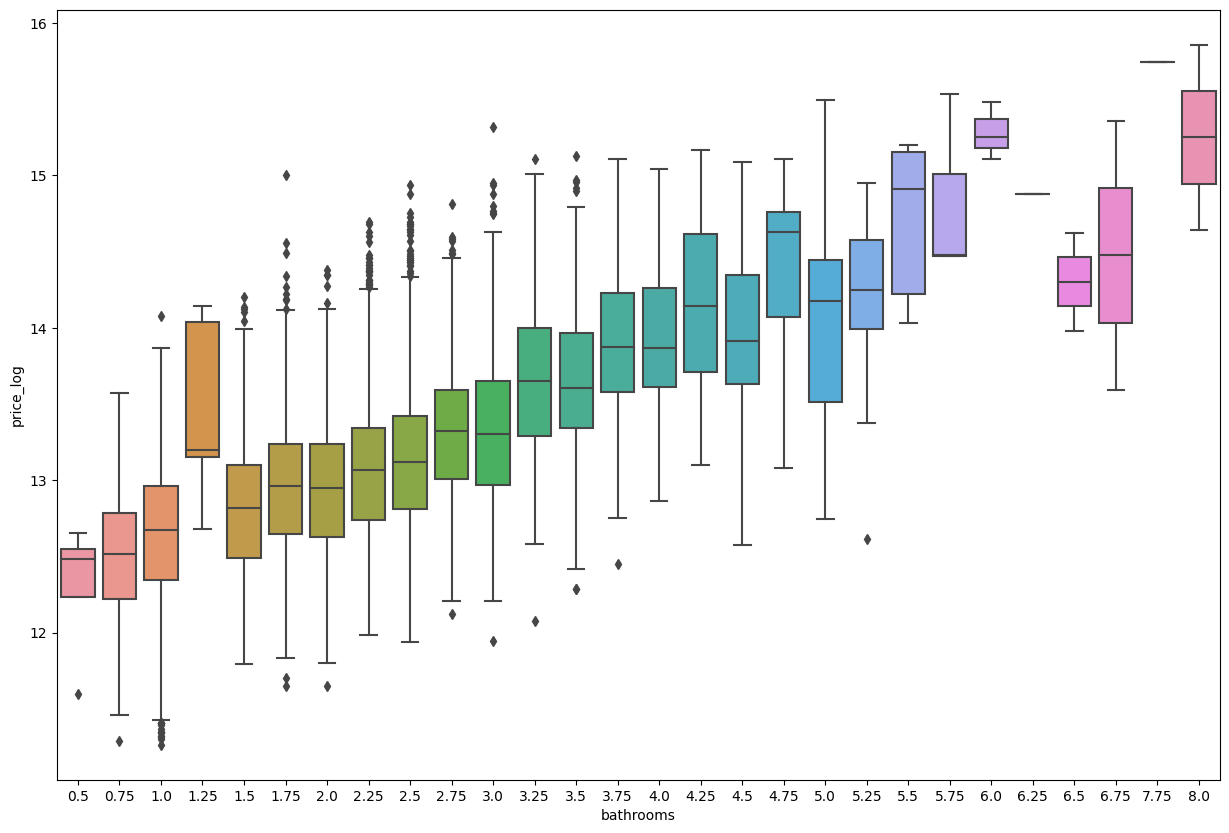

In [52]:
fig,ax = plt.subplots(2, 1, figsize = (15, 10))
sns.boxplot(x = train_data['sqft_living'], y = train_data['price_log'], ax = ax[0])
sns.boxplot(x = train_data['grade_int'], y = train_data['price_log'], ax = ax[1])
fig, axes = plt.subplots(1, 1, figsize = (15, 10))
sns.boxplot(x = train_data['bathrooms'], y = train_data['price_log'])

In [53]:
#Building a model with features with the highest correlations to price
high_corr = ['sqft_living', 'bathrooms', 'grade_int']

results = smf.ols(formula = "price_log ~ sqft_living + bathrooms + grade_int ", data=df_new).fit()

reg = linear_model.LinearRegression()
reg.fit(train_data[high_corr], train_data['price_log'])
pred = reg.predict(test_data[high_corr])
mean_squared_error = metrics.mean_squared_error(y_test, pred)

print(results.summary())


print('R squared training: ', round(reg.score(train_data[high_corr],train_data['price_log']), 3))
print('R squared testing: ', round(reg.score(test_data[high_corr],test_data['price_log']), 3))
print('Mean Squared Error(MSE): ', round(np.sqrt(mean_squared_error), 2))
print('Root Mean Squared Error(RMSE): ', ((results.resid ** 2).sum() / len(y_train)) ** 0.5)


                            OLS Regression Results                            
Dep. Variable:              price_log   R-squared:                       0.556
Model:                            OLS   Adj. R-squared:                  0.555
Method:                 Least Squares   F-statistic:                     8996.
Date:                Fri, 30 Sep 2022   Prob (F-statistic):               0.00
Time:                        11:11:22   Log-Likelihood:                -8035.8
No. Observations:               21597   AIC:                         1.608e+04
Df Residuals:                   21593   BIC:                         1.611e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept      11.1708      0.019    597.681      

The model has an R-squared of 0.556. This means that 55.6% of variations in the price can be explained for by the independent variables. This is also an improvement from the previous model which was at 48.4%. This means that our model satisfies both assumptions of normality and homoscedasticity since all p-values are below our alpha value of 0.05. 

#### Visualizing our model

C:\Users\user\AppData\Local\Temp\ipykernel_3964\146460171.py:6: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


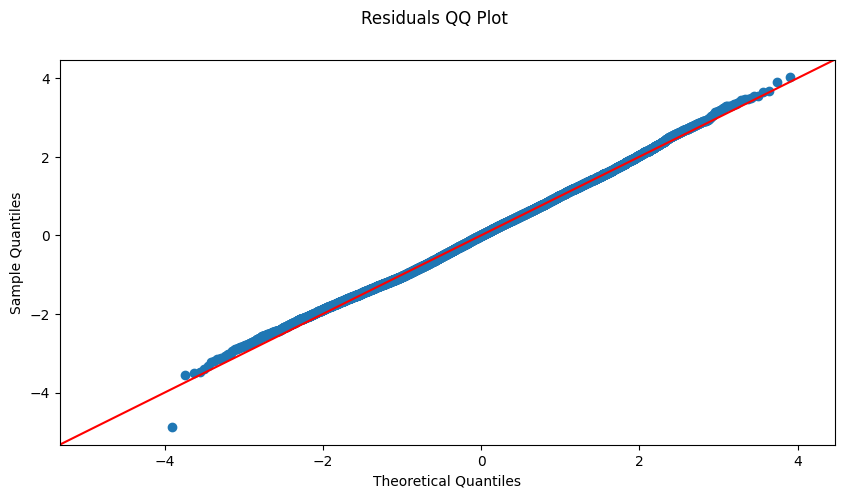

In [54]:
#Checking for normality
residuals = results.resid
fig = sm.graphics.qqplot(residuals, dist = stats.norm, line = '45', fit = True)
fig.suptitle('Residuals QQ Plot')
fig.set_size_inches(10, 5)
fig.show()

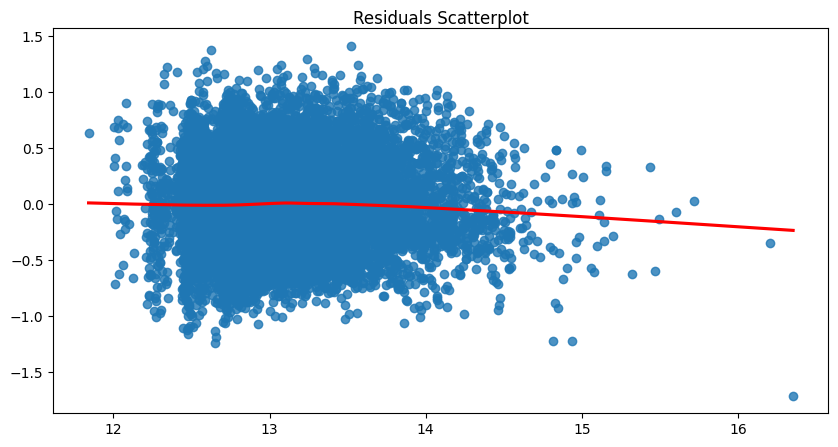

In [55]:
#Checking for homoscedasticity
plt.figure(figsize = (10,5))
sns.regplot(x = results.predict(), y = results.resid, lowess=True, line_kws = {'color': 'red'})
plt.title('Residuals Scatterplot', y=.99);

The data points are symmetrical and consistent along the x-axis.

#### Model 3

In [56]:
#Building a model with features with correlations to price
corr_feat = ['bedrooms', 'waterfront', 'floors', 'zipcode', 'grade_int', 'yr_built', 'bathrooms', 'sqft_living', 'grade_int']

results = smf.ols(formula = "price_log ~ bedrooms + waterfront + floors + zipcode + grade_int + yr_built + bathrooms + sqft_living + grade_int ", data=df).fit()
reg = linear_model.LinearRegression()
reg.fit(train_data[corr_feat], train_data['price_log'])
pred = reg.predict(test_data[corr_feat])
mean_squared_error = metrics.mean_squared_error(y_test, pred)

print(results.summary())


print('R squared training: ', round(reg.score(train_data[corr_feat], train_data['price_log']), 3))
print('R squared testing: ', round(reg.score(test_data[corr_feat], test_data['price_log']), 3))
print('Mean Squared Error(MSE): ', round(np.sqrt(mean_squared_error), 2))
print('Root Mean Squared Error(RMSE): ', ((results.resid ** 2).sum() / len(y_train)) ** 0.5)

                            OLS Regression Results                            
Dep. Variable:              price_log   R-squared:                       0.639
Model:                            OLS   Adj. R-squared:                  0.639
Method:                 Least Squares   F-statistic:                     4770.
Date:                Fri, 30 Sep 2022   Prob (F-statistic):               0.00
Time:                        11:12:06   Log-Likelihood:                -5799.4
No. Observations:               21597   AIC:                         1.162e+04
Df Residuals:                   21588   BIC:                         1.169e+04
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept      -2.2070      4.368     -0.505      

63.9% of the variations present in the price variable are explained by the independent variables in our model.

C:\Users\user\AppData\Local\Temp\ipykernel_3964\146460171.py:6: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


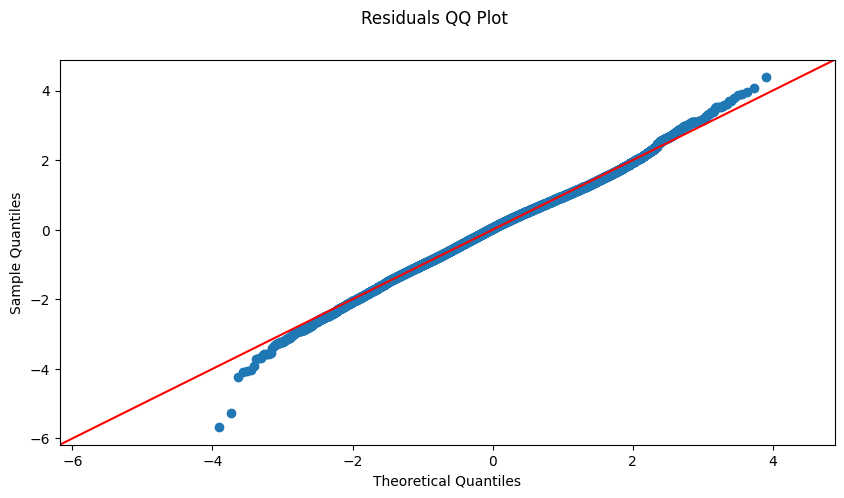

In [57]:
#Checking for normality
residuals = results.resid
fig = sm.graphics.qqplot(residuals, dist = stats.norm, line = '45', fit = True)
fig.suptitle('Residuals QQ Plot')
fig.set_size_inches(10, 5)
fig.show()

### Summary Results
#### R-Squared
- Model 1 has 0.484
- Model 2 has 0.556
- Model 3 has 0.639

#### Mean Squared Error
- Model 1 has 0.38
- Model 2 has 0.35
- Model 3 has 0.32

#### Root Mean Squared Error
- Model 1 has 0.379
- Model 2 has 0.392
- Model 3 has 0.353

### Interpretation of the Models
There is an increase in the variations of the price variable explained by the independent variables.
The mean error reduces with an increase in the models' R-squared.
The models RMSE increases with an increase in variables used to build the models.
All the models had a notable p-value that was below alpha of 0.05. This gives confidence in the models built as they are statistically significant. 

## Conclusion
There has been notable improvement in the accuracy of the models constructed. Proptech Properties Limited could adopt model 3 which has shown the highest accuracy levels and minimum error in the model. However, with more predictor variables being added to our model, the accuracy would significantly increase while the overall error reduces.

### Recommendations
1. It is evident from our models that a focus on grading of the houses, the size of living space(sqft_living) and bathrooms are the features showing a confidence in attracting higher sale prices. Proptech would use these as a basis to increase their command in the market.
2. There are notable features that showed great potential in attracting higher sale prices if they are improved upon. The general condition of the house, the number of bedrooms and number of floors are areas that may require intervention by Proptech Properties in their quest to deliver high end quality properties to home owners.

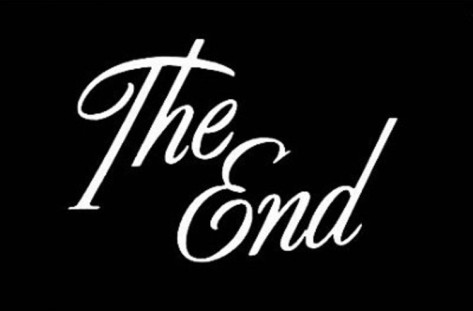